In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
file_path = 'C:\\Users\\amuthumanikandan\\PycharmProjects\\Meachine Learning\\Logistic Regression\\titanic_train.csv'
df = pd.read_csv(file_path)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
survived_count = df.groupby('Sex')['Survived'].value_counts()
print(survived_count)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [116]:
Pclass_counts = df.groupby(['Survived','Sex'])['Pclass'].value_counts()
print(Pclass_counts)

Survived  Sex     Pclass
0         female  3          72
                  2           6
                  1           3
          male    3         300
                  2          91
                  1          77
1         female  1          91
                  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
Name: count, dtype: int64


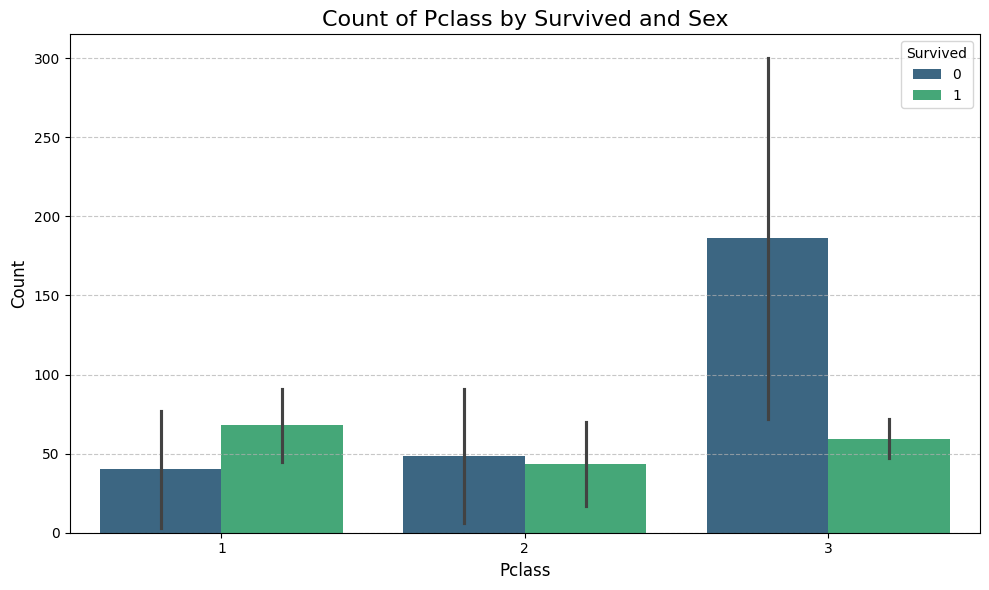

In [117]:
# Convert the series to a DataFrame
Pclass_counts = Pclass_counts.reset_index(name='Count')

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Pclass_counts,
    x='Pclass',
    y='Count',
    hue='Survived',
    palette='viridis'
)

# Customize the plot
plt.title('Count of Pclass by Survived and Sex', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

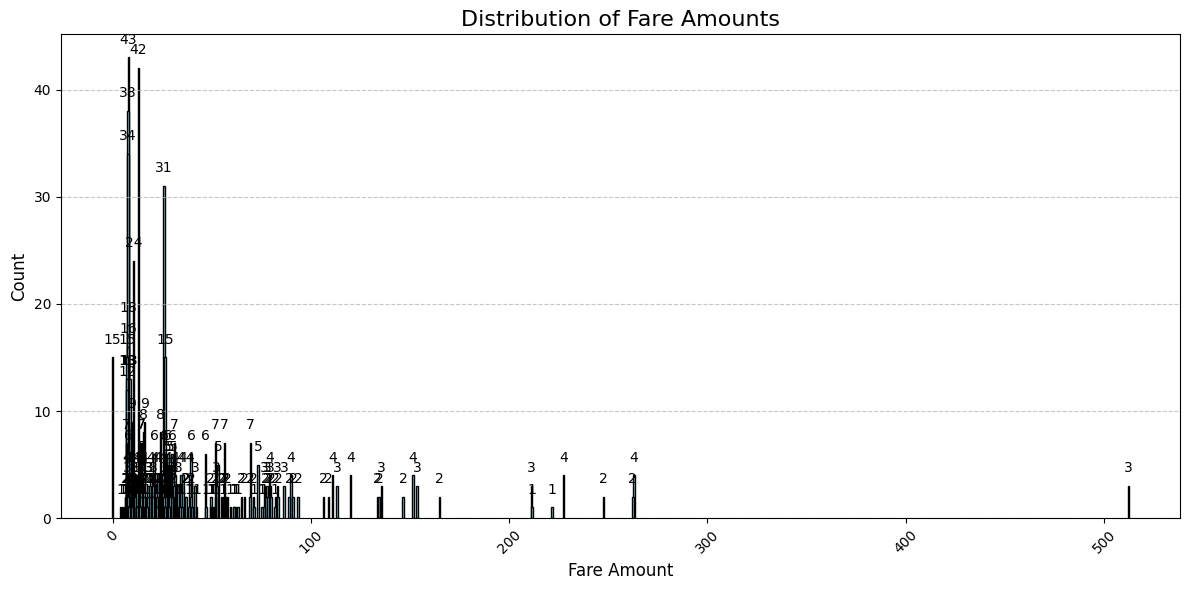

In [118]:
# Calculate the frequency of each unique Fare value
fare_counts = df['Fare'].value_counts().reset_index()
fare_counts.columns = ['Fare', 'Count']

# Plot the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(fare_counts['Fare'], fare_counts['Count'], color='skyblue', edgecolor='black')

# Add text annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height + 1,  # Y-coordinate (just above the bar)
        f'{int(height)}',  # Text to display
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Text color
    )

# Customize the plot
plt.title('Distribution of Fare Amounts', fontsize=16)
plt.xlabel('Fare Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



C:\Users\amuthumanikandan\AppData\Local\Temp\ipykernel_17544\1540325102.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




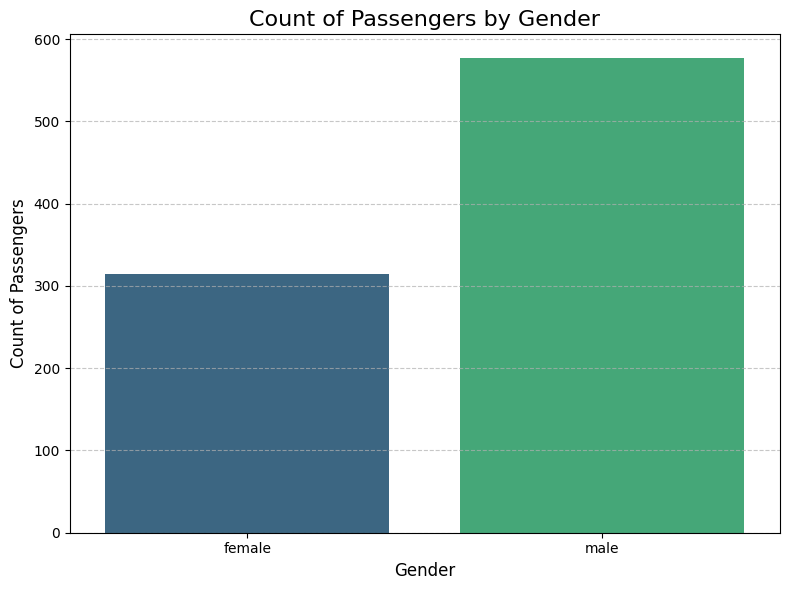

In [119]:

# Group by Sex and calculate the mean Fare
gender_fare_counts = df.groupby('Sex')['Fare'].count().reset_index()
gender_fare_counts.columns = ['Gender', 'Count']

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(
    data=gender_fare_counts,
    x='Gender',
    y='Count',
    palette='viridis'
)

# Customize the plot
plt.title('Count of Passengers by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [120]:
missing_ages = df['Age'].isnull().sum()
print("Count of missing ages",missing_ages)

total_values = df['Age'].count()
print("Total count",total_values)

missing_percentage = (missing_ages/total_values)*100
print("Miss%" , missing_percentage)

Count of missing ages 177
Total count 714
Miss% 24.789915966386555


C:\Users\amuthumanikandan\AppData\Local\Temp\ipykernel_17544\2764669888.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

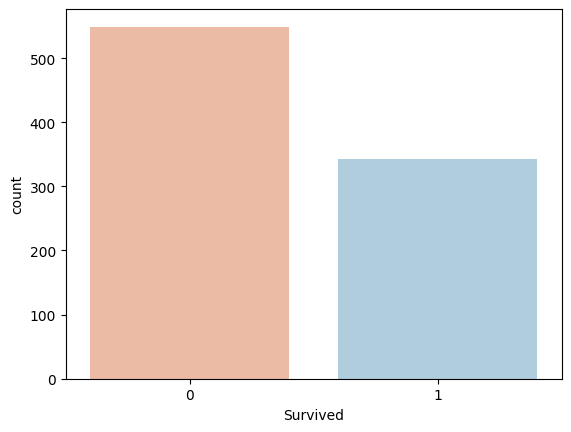

In [121]:
sns.countplot(x= 'Survived',data=df,palette="RdBu")

<Axes: xlabel='Survived', ylabel='count'>

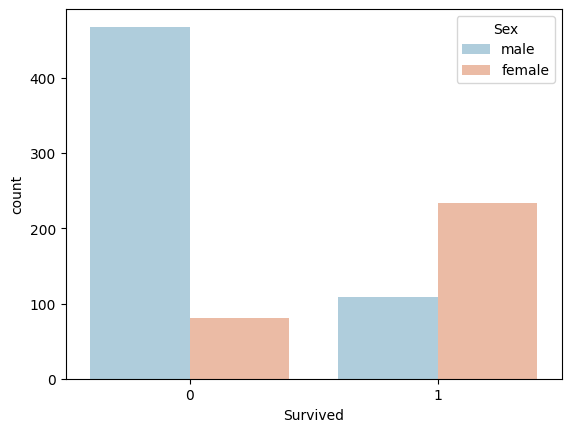

In [122]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

<Axes: xlabel='Age', ylabel='Count'>

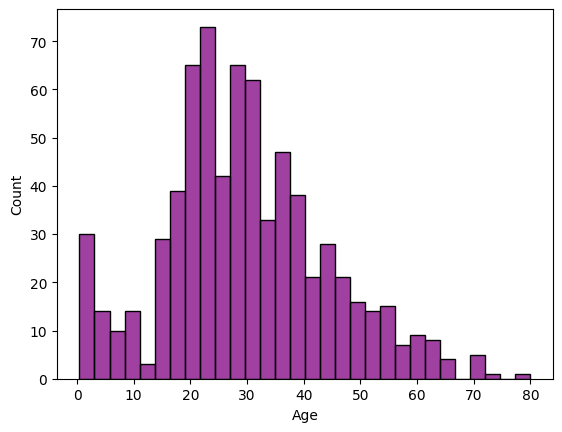

In [123]:
sns.histplot(df['Age'].dropna(), kde=False, color='purple', bins=30)

In [124]:
df['Class'] = df['Pclass'].replace({1:'Class 1', 2: 'Class 2', 3: 'Class 3'})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Class 3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Class 1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Class 3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Class 1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Class 3


In [125]:
df['Age'] = df.groupby('Class')['Age'].transform(lambda x:x.fillna(x.median()) )
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Class        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [126]:
pd.get_dummies(df['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [127]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [128]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [129]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [ ]:
train = pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Class 3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Class 1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Class 3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Class 1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Class 3


In [131]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Class'],
      dtype='object')

In [132]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Class     891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [145]:
df.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)


KeyError: "['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'] not found in axis"

In [141]:
df.drop(['Cabin'],axis=1,inplace=True)


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Class     891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [149]:
train.drop(['Cabin'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Class,male,Q,S
0,0,3,22.0,1,0,7.2500,Class 3,True,False,True
1,1,1,38.0,1,0,71.2833,Class 1,False,False,False
2,1,3,26.0,0,0,7.9250,Class 3,False,False,True
3,1,1,35.0,1,0,53.1000,Class 1,False,False,True
4,0,3,35.0,0,0,8.0500,Class 3,True,False,True


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Class     891 non-null    object 
 7   male      891 non-null    bool   
 8   Q         891 non-null    bool   
 9   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(1)
memory usage: 51.5+ KB


In [151]:
from sklearn.model_selection import train_test_split

In [153]:
X = train.drop('Survived',axis = 1)
y = train['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [154]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [158]:
from sklearn.linear_model import LogisticRegression


In [161]:
print(X_train.head())

     Pclass   Age  SibSp  Parch     Fare    Class   male      Q      S
520       1  30.0      0      0  93.5000  Class 1  False  False   True
510       3  29.0      0      0   7.7500  Class 3   True   True  False
446       2  13.0      0      1  19.5000  Class 2  False  False   True
2         3  26.0      0      0   7.9250  Class 3  False  False   True
691       3   4.0      0      1  13.4167  Class 3  False  False  False


In [162]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Class'] = le.fit_transform(X_train['Class'])
X_test['Class'] = le.transform(X_test['Class'])


In [163]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [164]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [165]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)


In [166]:
from sklearn.metrics import classification_report


In [167]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [168]:
from sklearn.metrics import confusion_matrix


In [169]:
confusion_matrix(y_test,predictions)


array([[135,  19],
       [ 37,  77]])